In [67]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [68]:
df = pd.read_csv('AnimalsHRvsBM.csv')
df.head()

,Animal,BM (g),HR (bpm)
0,Wild mouse,22,480
1,White rat,237,347
2,White mouse,29,376
3,Talapoin,100,233
4,Syrian bear,250000,70


In [69]:
df['BM_log'] = np.log10(df['BM (g)'])
df['HR_log'] = np.log10(df['HR (bpm)'])
df.head()

,Animal,BM (g),HR (bpm),BM_log,HR_log
0,Wild mouse,22,480,1.342423,2.681241
1,White rat,237,347,2.374748,2.540329
2,White mouse,29,376,1.462398,2.575188
3,Talapoin,100,233,2.000000,2.367356
4,Syrian bear,250000,70,5.397940,1.845098


In [70]:
x = df.BM_log
y = df.HR_log

In [71]:
X = np.column_stack([np.ones(x.shape),x])
print(X)

[[1.         1.34242268]
 [1.         2.37474835]
 [1.         1.462398  ]
 [1.         2.        ]
 [1.         5.39794001]
 [1.         2.2764618 ]
 [1.         3.69897   ]
 [1.         5.34242268]
 [1.         4.70757018]
 [1.         4.31597035]
 [1.         2.41497335]
 [1.         3.39794001]
 [1.         5.57403127]
 [1.         1.34242268]
 [1.         5.        ]
 [1.         1.43136376]
 [1.         3.81954394]
 [1.         7.47712125]
 [1.         4.81954394]
 [1.         5.69372695]
 [1.         1.95424251]
 [1.         2.77305469]
 [1.         4.96189547]
 [1.         6.53617953]
 [1.         4.39794001]
 [1.         3.69897   ]
 [1.         4.70415052]
 [1.         3.60205999]
 [1.         5.7363965 ]]


In [72]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([ 2.96088925, -0.21225037])

In [73]:
x_range = np.arange(0,8,0.1)
X_range = np.column_stack([np.ones(x_range.shape),x_range])
X_range[:5]

array([[1. , 0. ],
       [1. , 0.1],
       [1. , 0.2],
       [1. , 0.3],
       [1. , 0.4]])

In [74]:
ys_test = np.dot(X_range, w)
ys_test

array([2.96088925, 2.93966421, 2.91843917, 2.89721414, 2.8759891 ,
       2.85476406, 2.83353903, 2.81231399, 2.79108896, 2.76986392,
       2.74863888, 2.72741385, 2.70618881, 2.68496377, 2.66373874,
       2.6425137 , 2.62128866, 2.60006363, 2.57883859, 2.55761355,
       2.53638852, 2.51516348, 2.49393844, 2.47271341, 2.45148837,
       2.43026333, 2.4090383 , 2.38781326, 2.36658822, 2.34536319,
       2.32413815, 2.30291311, 2.28168808, 2.26046304, 2.239238  ,
       2.21801297, 2.19678793, 2.17556289, 2.15433786, 2.13311282,
       2.11188779, 2.09066275, 2.06943771, 2.04821268, 2.02698764,
       2.0057626 , 1.98453757, 1.96331253, 1.94208749, 1.92086246,
       1.89963742, 1.87841238, 1.85718735, 1.83596231, 1.81473727,
       1.79351224, 1.7722872 , 1.75106216, 1.72983713, 1.70861209,
       1.68738705, 1.66616202, 1.64493698, 1.62371194, 1.60248691,
       1.58126187, 1.56003683, 1.5388118 , 1.51758676, 1.49636173,
       1.47513669, 1.45391165, 1.43268662, 1.41146158, 1.39023

In [75]:
ys = np.dot(X,w)
ys

array([2.67595954, 2.45684804, 2.65049474, 2.53638852, 1.81517451,
       2.4777094 , 2.17578151, 1.82695808, 1.96170576, 2.04482296,
       2.44831027, 2.23967524, 1.77779907, 2.67595954, 1.89963742,
       2.65708177, 2.15018965, 1.37386753, 1.93793929, 1.75239362,
       2.54610056, 2.37230738, 1.90772512, 1.57358275, 2.02742487,
       2.17578151, 1.96243158, 2.1963507 , 1.74333699])

In [76]:
print(10**ys)

[474.19780875 286.31759867 447.19273336 343.86542965  65.33930452
 300.40654981 149.89305528  67.13640477  91.55999427 110.87227629
 280.74386311 173.6501803   59.95136467 474.19780875  79.36653492
 454.02708903 141.31545168  23.65198135  86.68406826  56.54492356
 351.64185347 235.67166776  80.85839554  37.46129208 106.51845854
 149.89305528  91.7131438  157.16314019  55.37796506]


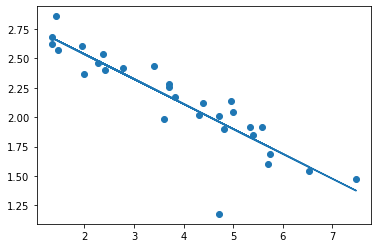

In [77]:
plt.scatter(x,y)
plt.plot(x,ys)
plt.show()

In [78]:
X_quad = np.column_stack([np.ones(x.shape),x, x**2])
print(X_quad[0:5])

[[ 1.          1.34242268  1.80209865]
 [ 1.          2.37474835  5.63942971]
 [ 1.          1.462398    2.1386079 ]
 [ 1.          2.          4.        ]
 [ 1.          5.39794001 29.13775634]]


In [79]:
y_normal = df['HR (bpm)']

In [80]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_normal)
w

array([523.4278885 , -84.14283701])

In [81]:
ys_normal = np.dot(X, w)
ys_normal

array([ 410.47263567,  323.60982549,  400.37757212,  355.14221449,
         69.22990217,  331.87993396,  212.18605833,   73.90128764,
        127.31957847,  160.26989919,  320.22517971,  237.51557619,
         54.41308406,  410.47263567,  102.71370346,  402.9888806 ,
        202.04062569, -105.71830652,  117.89778868,   44.34154987,
        358.99237956,  290.09519942,  105.91992641,  -26.54480053,
        153.37273918,  212.18605833,  127.6073183 ,  220.34034176,
         40.7512126 ])

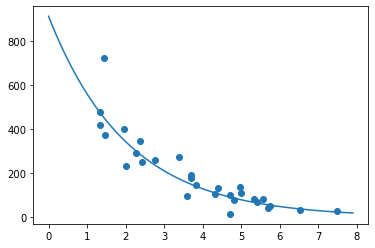

In [84]:
plt.scatter(x, df['HR (bpm)'])
plt.plot(x_range,10**ys_test)
plt.show()